In [5]:
# Install required packages if not installed
# Crawling data requires time and bypassing the anti-crawling mechanism, 
# so it takes time and cannot be successful every time.
# If you just want to experience data analysis,
# please move to the bottom to start the code for data analysis and visualization.
pip install selenium pandas


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [51]:
#After searching based on Weibo keywords and crawling according to the comprehensive results.
# Import necessary libraries
# Set up Selenium WebDriver for web scraping
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
# Import necessary libraries
# Set up Selenium WebDriver for web scraping
from selenium.webdriver.common.action_chains import ActionChains
import time
import pandas as pd
import os
import json
# step 1 Fill in your Weibo Cookies.(It is best to search on the search page and obtain the newly refreshed cookies.)
# got cookies.json
def load_cookies(cookie_path="cookies.json"):
    with open(cookie_path, "r", encoding="utf-8") as f:
        return json.load(f)

WEIBO_COOKIES = load_cookies()
[
    {"name": "ALF", "value": "xxxxx", "domain": ".weibo.com"},
    {"name": "SCF", "value": "xxxxx", "domain": ".weibo.com"},
    {"name": "SUB", "value": "xxxxx", "domain": ".weibo.com"}
]

# step 2 Set the ChromeDriver path.
CHROME_DRIVER_PATH = r"YOUR_CHROMEDRIVER_PATH_HERE" # Set the path to your ChromeDriver executable
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.service import Service

# Automatically install and obtain ChromeDriver
CHROME_DRIVER_PATH = ChromeDriverManager().install()


# step 3 Create WebDriver
# Function to initialize WebDriver
# Function to initialize and configure WebDriver
def get_driver():
    options = Options()
    options.add_argument("--disable-gpu")
    options.add_argument("--no-sandbox")
    options.add_argument("--disable-dev-shm-usage")
    options.add_argument("--disable-blink-features=AutomationControlled")
    options.add_experimental_option("excludeSwitches", ["enable-automation"])
    options.add_experimental_option("useAutomationExtension", False)

    service = Service(CHROME_DRIVER_PATH)
# Configure Selenium WebDriver
# Set up Selenium WebDriver for web scraping
    driver = webdriver.Chrome(service=service, options=options)

    # visit the Weibo homepage firstly
    driver.get("https://weibo.com/")
# Load dataset
# Load dataset from file
    time.sleep(5)  # Waiting for the page to load

# Define Weibo login cookies
# Define login cookies for Weibo access
    for cookie in WEIBO_COOKIES:
        driver.add_cookie(cookie)

    # Refresh the page to ensure that Cookies take effect.
    driver.get("https://s.weibo.com/")
# Pause execution to mimic human behavior
# Introduce delay to mimic human browsing behavior
    time.sleep(3)
    return driver

# Load dataset
# Load dataset from file
# step 4 Crawl Weibo comments and posting time (optimize sliding and loading)
# Function to scrape Weibo comments
# Function to scrape comments from Weibo search results
def fetch_weibo_comments(search_query, max_scrolls=20):
# Function to initialize WebDriver
# Function to initialize and configure WebDriver
    driver = get_driver()
    search_url = f"https://s.weibo.com/weibo?q={search_query}"
    driver.get(search_url)
# Pause execution to mimic human behavior
# Introduce delay to mimic human browsing behavior
    time.sleep(5)

    comments = []
    timestamps = []
    
    for _ in range(max_scrolls):
        posts = driver.find_elements(By.CSS_SELECTOR, "div.card-wrap")
        for post in posts:
            try:
                comment_element = post.find_element(By.CSS_SELECTOR, "p.txt")
                timestamp_element = post.find_element(By.CSS_SELECTOR, "div.from a")
                comment = comment_element.text.strip()
                timestamp = timestamp_element.text.strip()
                if comment and timestamp:
                    comments.append(comment)
                    timestamps.append(timestamp)
            except:
                continue
        
# Load dataset
# Load dataset from file
        # Optimize real-person sliding and scrolling loading
        driver.execute_script("window.scrollBy(0, 500);")
# Pause execution to mimic human behavior
# Introduce delay to mimic human browsing behavior
        time.sleep(1)
        driver.execute_script("window.scrollBy(0, 500);")
# Pause execution to mimic human behavior
# Introduce delay to mimic human browsing behavior
        time.sleep(2)
    driver.quit()

    if comments:
        return pd.DataFrame({"评论": comments, "发布时间": timestamps})
    else:
# Log progress messages
# Log progress for debugging and tracking
        print("No data has been crawled. Please check if the Weibo page is updated.")
        return None

# step 5 Run the crawling task
# Log progress messages
# Log progress for debugging and tracking
print("The Weibo comments are being crawled. Please wait a moment....")
# Function to scrape Weibo comments
# Function to scrape comments from Weibo search results
data = fetch_weibo_comments("萨菲罗斯", max_scrolls=50)

# Save data
if data is not None:
    save_path = r"C:\Users\wusiq\Desktop\萨菲罗斯"
    os.makedirs(save_path, exist_ok=True)
# Save data to CSV file
# Save processed data to a CSV file
    data.to_csv(os.path.join(save_path, "萨菲罗斯_微博评论.csv"), index=False, encoding="utf-8-sig")
# Log progress messages
# Log progress for debugging and tracking
    print(f"Crawling completed, data has been saved to {save_path}\\萨菲罗斯_微博评论.csv")
else:
# Log progress messages
# Log progress for debugging and tracking
    print("There is still no data. Please check if the Weibo page is updated.")


🔍 正在爬取微博评论，请稍等...
✅ 爬取完成，数据已保存到 C:\Users\wusiq\Desktop\萨菲罗斯\萨菲罗斯_微博评论.csv


In [111]:
#After comprehensive crawling, crawl specific areas according to specific times.
# Import necessary libraries
# Set up Selenium WebDriver for web scraping
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.common.action_chains import ActionChains
import time
import pandas as pd
import os

# Fill in your Weibo Cookies.(It is best to search on the search page and obtain the newly refreshed cookies.)
# Define Weibo login cookies
# Define login cookies for Weibo access
# step 1 Fill in your Weibo Cookies.(It is best to search on the search page and obtain the newly refreshed cookies.)
# got cookies.json
def load_cookies(cookie_path="cookies.json"):
    with open(cookie_path, "r", encoding="utf-8") as f:
        return json.load(f)

WEIBO_COOKIES = load_cookies()
[
    {"name": "ALF", "value": "xxxxx", "domain": ".weibo.com"},
    {"name": "SCF", "value": "xxxxx", "domain": ".weibo.com"},
    {"name": "SUB", "value": "xxxxx", "domain": ".weibo.com"}
]

# step 2 Set the ChromeDriver path.
CHROME_DRIVER_PATH = r"YOUR_CHROMEDRIVER_PATH_HERE"
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.service import Service

# Automatically install and obtain ChromeDriver
CHROME_DRIVER_PATH = ChromeDriverManager().install()

# Create WebDriver
# Function to initialize WebDriver
# Function to initialize and configure WebDriver
def get_driver():
    options = Options()
    options.add_argument("--disable-gpu")
    options.add_argument("--no-sandbox")
    options.add_argument("--disable-dev-shm-usage")
    options.add_argument("--disable-blink-features=AutomationControlled")
    options.add_experimental_option("excludeSwitches", ["enable-automation"])
    options.add_experimental_option("useAutomationExtension", False)

    service = Service(CHROME_DRIVER_PATH)
# Configure Selenium WebDriver
# Set up Selenium WebDriver for web scraping
    driver = webdriver.Chrome(service=service, options=options)

    # First, visit the Weibo homepage.
    driver.get("https://weibo.com/")
# Load dataset
# Load dataset from file
    time.sleep(5)  # Waiting for the page to load

# Define Weibo login cookies
# Define login cookies for Weibo access
    for cookie in WEIBO_COOKIES:
        driver.add_cookie(cookie)

    # Refresh the page to ensure that Cookies take effect.
    driver.get("https://s.weibo.com/")
# Pause execution to mimic human behavior
# Introduce delay to mimic human browsing behavior
    time.sleep(3)
    return driver

# Load dataset
# Load dataset from file
# Crawl Weibo comments and posting time (optimize sliding and loading, support filtering by time)
# Function to scrape Weibo comments
# Function to scrape comments from Weibo search results
def fetch_weibo_comments(search_query, start_date="2021-06-01", end_date="2022-12-11", max_scrolls=50):
# Function to initialize WebDriver
# Function to initialize and configure WebDriver
    driver = get_driver()
    search_url = f"https://s.weibo.com/weibo?q={search_query}&typeall=1&suball=1&timescope=custom%3A{start_date}%3A{end_date}"
    driver.get(search_url)
# Pause execution to mimic human behavior
# Introduce delay to mimic human browsing behavior
    time.sleep(5)

    comments = []
    timestamps = []
    
    for i in range(max_scrolls):
        posts = driver.find_elements(By.CSS_SELECTOR, "div.card-wrap")
        if not posts:
# Log progress messages
# Log progress for debugging and tracking
            print("There are no more Weibo posts, and the crawling is exited in advance.")
            break
        
        for post in posts:
            try:
                comment_element = post.find_element(By.CSS_SELECTOR, "p.txt")
                timestamp_element = post.find_element(By.CSS_SELECTOR, "div.from a")
                comment = comment_element.text.strip()
                timestamp = timestamp_element.text.strip()
                if comment and timestamp:
                    comments.append(comment)
                    timestamps.append(timestamp)
            except:
                continue
        
        # Optimize sliding to avoid triggeringthe anti-crawler mechanism.
        driver.execute_script("window.scrollBy(0, 500);")
# Pause execution to mimic human behavior
# Introduce delay to mimic human browsing behavior
        time.sleep(1)
        driver.execute_script("window.scrollBy(0, 500);")
# Pause execution to mimic human behavior
# Introduce delay to mimic human browsing behavior
        time.sleep(2)
    
    driver.quit()

    if comments:
        return pd.DataFrame({"评论": comments, "发布时间": timestamps})
    else:
# Log progress messages
# Log progress for debugging and tracking
        print("No data has been crawled. Please check if the Weibo page is updated or adjust the time range.")
        return None

# Run the crawling task and specify the time range.
# Log progress messages
# Log progress for debugging and tracking
print("We are crawling Weibo comments. Please wait a moment...")
# Function to scrape Weibo comments
# Function to scrape comments from Weibo search results
data = fetch_weibo_comments("艾伦 耶格尔", start_date="2021-06-01", end_date="2022-12-11", max_scrolls=100)

# save data
if data is not None:
    save_path = r"C:\Users\wusiq\Desktop\艾伦 耶格尔"
    os.makedirs(save_path, exist_ok=True)
# Save data to CSV file
# Save processed data to a CSV file
    data.to_csv(os.path.join(save_path, "艾伦 耶格尔_微博评论_20221.csv"), index=False, encoding="utf-8-sig")
# Log progress messages
# Log progress for debugging and tracking
    print(f"Crawling completed, and the data has been saved to {save_path}\\艾伦 耶格尔_微博评论_20221.csv")
else:
# Log progress messages
# Log progress for debugging and tracking
    print("There is still no data. Please check if the Weibo page is updated or adjust the time range.")


We are crawling Weibo comments. Please wait a moment...
Crawling completed, and the data has been saved to C:\Users\wusiq\Desktop\艾伦 耶格尔\艾伦 耶格尔_微博评论_20221.csv


In [114]:
# Merge datasets
# Merge datasets for combined analysis
#If you have multiple crawled files, merge the files here.
# Import necessary libraries
import pandas as pd
import os

# Merge datasets
# Merge datasets for combined analysis
# Define the file paths to be merged.
file_paths = [
    r"C:\Users\wusiq\Desktop\艾伦 耶格尔\艾伦 耶格尔_微博评论clean_合并.csv",
    r"C:\Users\wusiq\Desktop\艾伦 耶格尔\艾伦 耶格尔_微博评论_20221clean.csv"
]

# Filter out non-existent files to avoid error reporting.
existing_files = [file for file in file_paths if os.path.exists(file)]

if existing_files:
# Load dataset
# Load dataset from file
    df_list = [pd.read_csv(file, dtype=str) for file in existing_files]  # Read the data and keep all columns as strings.
    df_combined = pd.concat(df_list, ignore_index=True)  # Merge data directly

# Merge datasets
# Merge datasets for combined analysis
    # Save the merged data
# Merge datasets
# Merge datasets for combined analysis
    merged_file_path = r"C:\Users\wusiq\Desktop\艾伦 耶格尔\艾伦 耶格尔_微博评论clean_合并.csv"
# Merge datasets
# Merge datasets for combined analysis
    df_combined.to_csv(merged_file_path, index=False, encoding="utf-8-sig")

# Merge datasets
# Merge datasets for combined analysis
    print(f"Data merging completed (not sorted bytime) and has been saved to {merged_file_path}")
else:
# Merge datasets
# Merge datasets for combined analysis
    print("No any available CSV files were found and cannot be merged.")


Data merging completed (not sorted bytime) and has been saved to C:\Users\wusiq\Desktop\艾伦 耶格尔\艾伦 耶格尔_微博评论clean_合并.csv


In [167]:
# Import necessary libraries
import pandas as pd
import os

# If you have a completed dataset that does not require crawling or merging, start cleaning from this step.
# Assume that if cleaning is not needed, please skip this step.

# Merge datasets
# Merge datasets for combined analysis
# Define the file path for the merged dataset
file_path = r"C:\Users\wusiq\Desktop\萨菲罗斯\萨菲罗斯_微博评论合并_cleaned.csv"

# Check if the file exists before proceeding
if os.path.exists(file_path):
    # Read CSV File
# Load dataset
# Load dataset from file
    df = pd.read_csv(file_path, dtype=str)  # Read all columns as strings to avoid data type issues

    # Define the keywords that need to be removed (advertisements, irrelevant names, etc.)
    keywords = [
        "广告", "推广", "点击链接",  "博主", "明星",  "快来看", "直播", "合作", "商务", "优惠", "营销", 
        "买一送一", "特价", "转发", "福利", "官方", "微博超话",  "品牌", "电商", "新品", "热卖", "活动", 
        "sc", "SC", "克劳德", "推文", "黄", "升职器", "红包", "cloud", "转发", "@Sephiroth",  "cp"
        "广告", "推广", "点击链接", "关注", "博主", "明星", "视频", "粉丝", "快来看", "直播",
        "合作", "商务", "优惠", "营销", "买一送一", "特价", "转发", "福利",  "品牌", "电商",  "热卖",  
        "推荐", "转载", "抽奖", "生日", "抽",
        "转发抽奖", "资源", "链接",  "封神", "乌尔善"
    ]

    # Filter out comments containing these keywords
    df_filtered = df[~df["评论"].str.contains("|".join(keywords), na=False)]

    # Remove duplicate comments
    df_filtered = df_filtered.drop_duplicates(subset=["评论"], keep="first")

    # Save the cleaned dataset
    cleaned_file_path = r"C:\Users\wusiq\Desktop\萨菲罗斯\萨菲罗斯_微博评论合并_cleaned.csv"
# Save data to CSV file
# Save processed data to a CSV file
    df_filtered.to_csv(cleaned_file_path, index=False, encoding="utf-8-sig")

# Log progress messages
# Log progress for debugging and tracking
    print(f"Data cleaning completed and saved to {cleaned_file_path}")
else:
# Log progress messages
# Log progress for debugging and tracking
    print("The specified file does not exist. Please check the file path and try again.")


✅ Data cleaning completed and saved to C:\Users\wusiq\Desktop\萨菲罗斯\萨菲罗斯_微博评论合并_cleaned.csv


In [172]:
# Install required packages if not installed
# Install required packages if missing
# start analysis
pip install tqdm

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


Processing Eren Yeager...
Step 1: Performing SnowNLP Sentiment Analysis for Eren Yeager...


100%|██████████████████████████████████████████████████████████████████████████████| 1038/1038 [00:21<00:00, 47.39it/s]


Eren Yeager - Before Dec 30, 2019 Data Count: 228
Eren Yeager - After Dec 30, 2019 Data Count: 810
Processing Sephiroth...
Step 1: Performing SnowNLP Sentiment Analysis for Sephiroth...


100%|████████████████████████████████████████████████████████████████████████████████| 825/825 [00:11<00:00, 71.25it/s]


Sephiroth - Before Dec 30, 2019 Data Count: 225
Sephiroth - After Dec 30, 2019 Data Count: 600
Processing Shen Gongbao...
Step 1: Performing SnowNLP Sentiment Analysis for Shen Gongbao...


100%|████████████████████████████████████████████████████████████████████████████████| 209/209 [00:04<00:00, 46.24it/s]


Shen Gongbao - Before Dec 30, 2019 Data Count: 124
Shen Gongbao - After Dec 30, 2019 Data Count: 85
All sentiment analysis completed and saved.


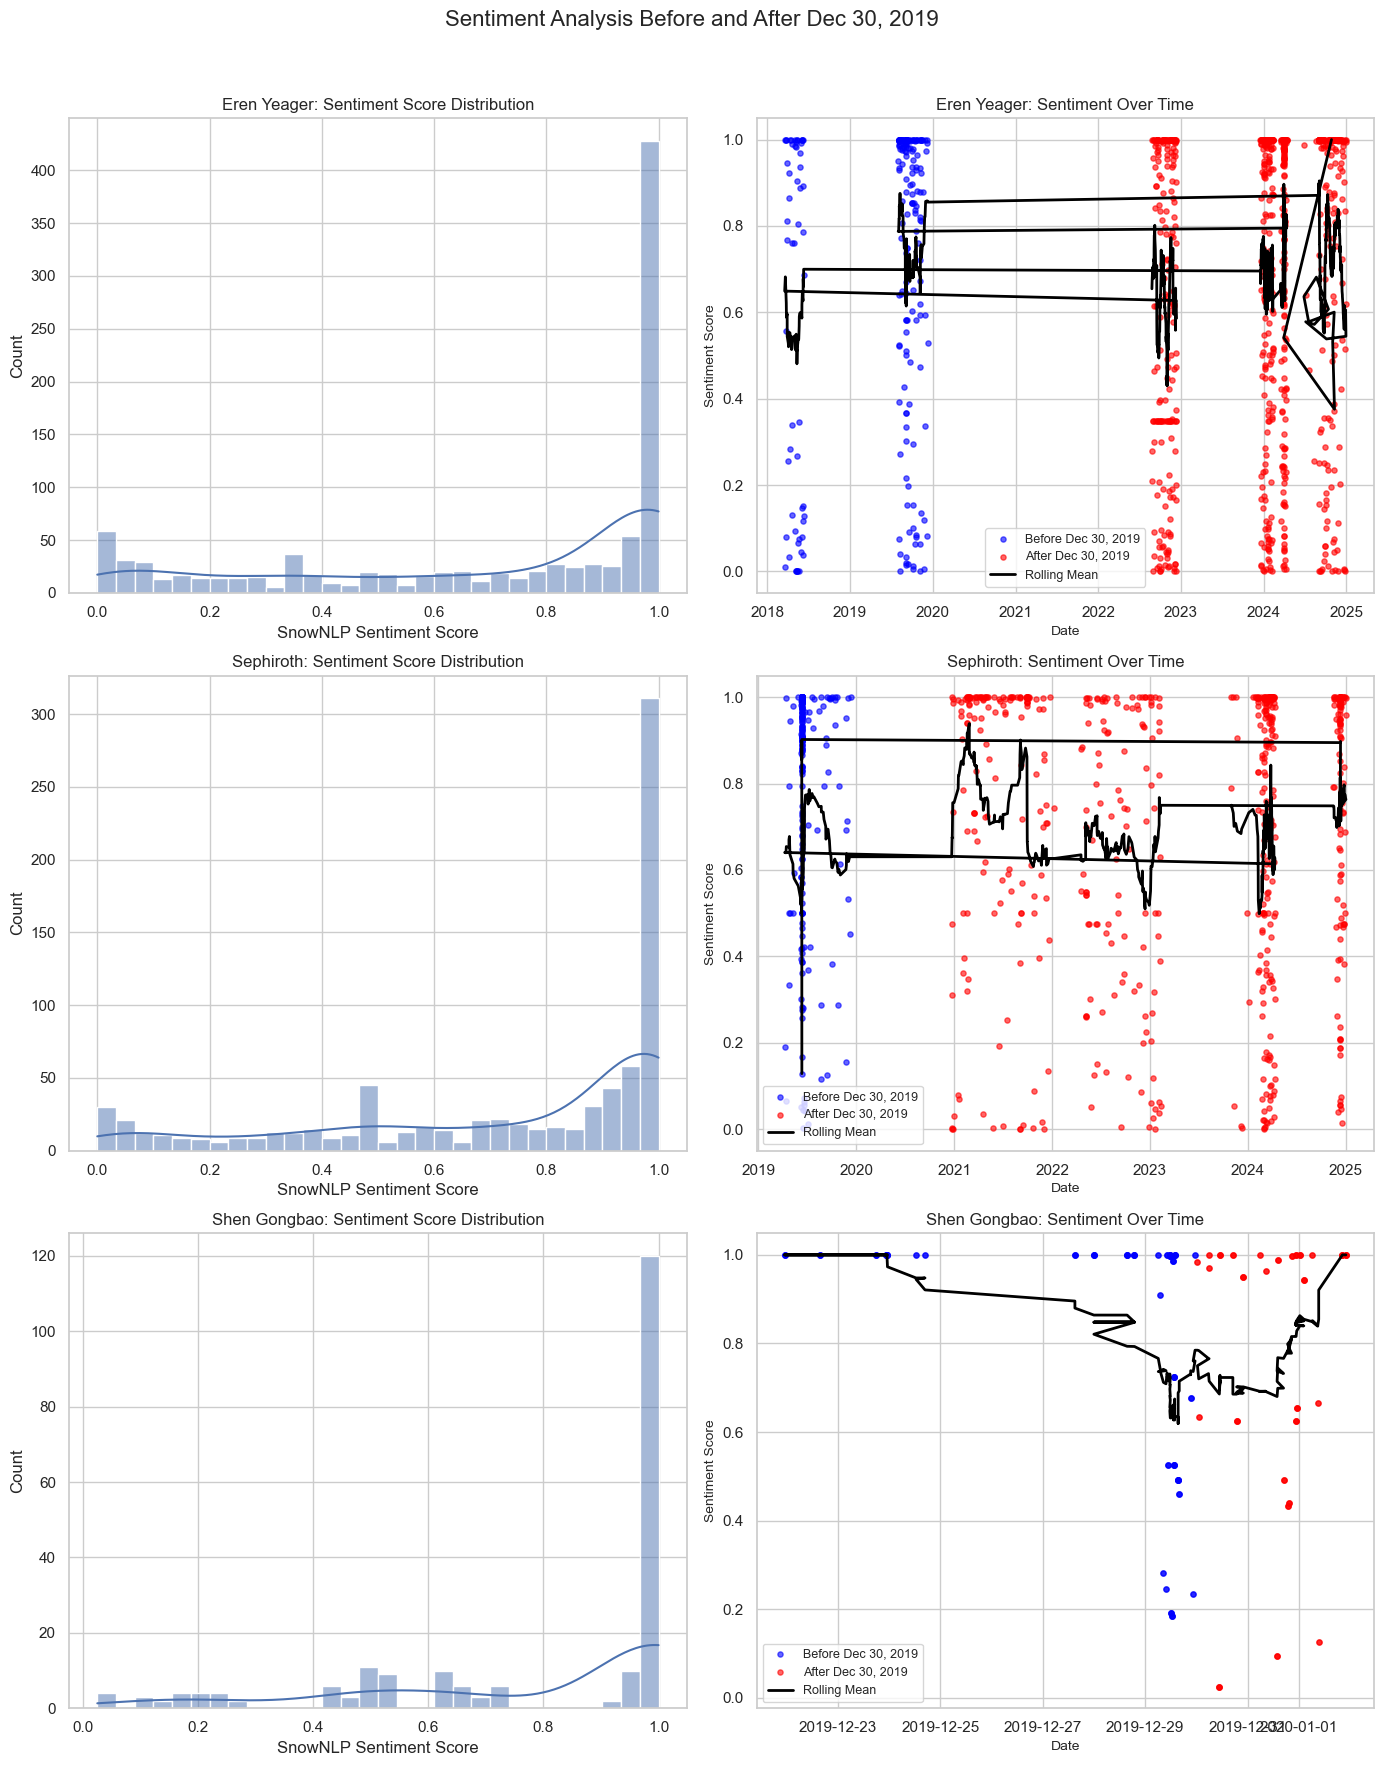

Sentiment analysis visualization saved to C:\Users\wusiq\Desktop\2/sentiment_analysis_snownlp.png


In [189]:
# Import necessary libraries
import pandas as pd # Data manipulation and processing
import matplotlib.pyplot as plt # Data visualization
import seaborn as sns # Statistical data visualization
from snownlp import SnowNLP # Chinese sentiment analysis library
from tqdm import tqdm # Progress bar for iterations

# Enable tqdm for Pandas apply() to show progress bars
tqdm.pandas()

#Define file paths for datasets, each representing a different character (remreber change to your own address)
data_files = {
    "Eren Yeager": r"C:\Users\wusiq\Desktop\艾伦 耶格尔\艾伦 耶格尔_微博评论clean_合并.csv",
    "Sephiroth": r"C:\Users\wusiq\Desktop\萨菲罗斯\萨菲罗斯_微博评论合并_cleaned.csv",
    "Shen Gongbao": r"C:\Users\wusiq\Desktop\申公豹\申公豹_微博评论_合并.csv"
}

# Define the save path for processed data and visualizations
save_path = r"C:\Users\wusiq\Desktop\2"

# Function to perform sentiment analysis using SnowNLP
def analyze_sentiment_snownlp(text):
    """
    Analyze the sentiment of a given text using SnowNLP.
    
    - Returns a sentiment score between [0,1].
    - 0 represents a negative sentiment, 1 represents a positive sentiment.
    """
    try:
        return SnowNLP(text).sentiments  # Returns a value between 0 and 1
    except:
        return None

# Process each dataset(one for each character)
results = {}
for character, file_path in data_files.items():
    print(f"Processing {character}...")

    #Load the dataset (Weibo comments)
    df = pd.read_csv(file_path, dtype=str)

    #Remove rows where '评论' (Comment) or '发布时间' (Post Time) is missing
    df = df.dropna(subset=["评论", "发布时间"])

    # Convert '发布时间' (Post Time) to datetime format
    df["发布时间"] = pd.to_datetime(df["发布时间"], format="%Y年%m月%d日 %H:%M", errors="coerce")
    # Drop rows where datetime conversion failed
    df = df.dropna(subset=["发布时间"])  

    # Apply SnowNLP sentiment analysis to each comment
    print(f"Step 1: Performing SnowNLP Sentiment Analysis for {character}...")
    df["SnowNLP Sentiment Score"] = df["评论"].progress_apply(analyze_sentiment_snownlp)
    # Drop rows where sentiment analysis failed (NaN values)
    df = df.dropna(subset=["SnowNLP Sentiment Score"])  # Remove NaN sentiment scores

    # Save the processed dataset to a CSV file
    cleaned_file = f"{save_path}/{character}_sentiment_snownlp.csv"
    df.to_csv(cleaned_file, index=False, encoding="utf-8-sig")
    results[character] = df # Store processed data in results dictionary

    # Define the cutoff date for sentiment analysis segmentation(before vs. after)
    cutoff_date = pd.to_datetime("2019-12-30")

    #  Split data into two groups: Before and after the cutoff date
    df_pre = df[df["发布时间"] < cutoff_date].dropna(subset=["SnowNLP Sentiment Score"])
    df_post = df[df["发布时间"] >= cutoff_date].dropna(subset=["SnowNLP Sentiment Score"])

    # Log the number of data points in each period
    print(f"{character} - Before Dec 30, 2019 Data Count: {len(df_pre)}")
    print(f"{character} - After Dec 30, 2019 Data Count: {len(df_post)}")

# Log completion of sentiment analysis
print("All sentiment analysis completed and saved.")

# Visualization of sentiment scores before and after Dec 30, 2019
if len(results) > 0:
    # Create subplots: One row per character, two columns (histogram + scatter plot)
    fig, axes = plt.subplots(len(results), 2, figsize=(14, 6 * len(results)))
    fig.suptitle("Sentiment Analysis Before and After Dec 30, 2019", fontsize=16)

    for i, (character, df) in enumerate(results.items()):
        cutoff_date = pd.to_datetime("2019-12-30")
        df_pre = df[df["发布时间"] < cutoff_date].dropna(subset=["SnowNLP Sentiment Score"])
        df_post = df[df["发布时间"] >= cutoff_date].dropna(subset=["SnowNLP Sentiment Score"])

        # Plot histogram of sentiment scores
        sns.histplot(df["SnowNLP Sentiment Score"], bins=30, kde=True, ax=axes[i, 0])
        axes[i, 0].set_title(f"{character}: Sentiment Score Distribution", fontsize=12)

        # Scatter plot of sentiment scores over time
        axes[i, 1].scatter(df_pre["发布时间"], df_pre["SnowNLP Sentiment Score"], alpha=0.6, s=14, label="Before Dec 30, 2019", color='blue')
        axes[i, 1].scatter(df_post["发布时间"], df_post["SnowNLP Sentiment Score"], alpha=0.6, s=14, label="After Dec 30, 2019", color='red')

        # Plot rolling mean of sentiment scores for smoothing effect
        axes[i, 1].plot(df["发布时间"], df["SnowNLP Sentiment Score"].rolling(30, min_periods=1).mean(), color='black', linewidth=2, label="Rolling Mean")
        # Adjust legend and labels for clarity
        axes[i, 1].legend(fontsize=9)
        axes[i, 1].set_title(f"{character}: Sentiment Over Time", fontsize=12)
        axes[i, 1].set_xlabel("Date", fontsize=10)
        axes[i, 1].set_ylabel("Sentiment Score", fontsize=10)

    # Adjust layout to prevent overlapping
    plt.tight_layout()
    plt.subplots_adjust(top=0.92)

    # Save the visualization to a file
    output_path = f"{save_path}/sentiment_analysis_snownlp.png"
    plt.savefig(output_path, dpi=300)
    plt.show()

    #Log success message
    print(f"Sentiment analysis visualization saved to {output_path}")

else:
    # Log failure message
    print("No valid data available for visualization.")


In [20]:
#After merging the data sets of the three characters into one after the data of three Weibo individuals, continue the data analysis.
# Import necessary libraries
import pandas as pd # For data manipulation
import re # For handling string-based timestamp conversion
from datetime import datetime, timedelta # For handling date operations

# Define file paths for three datasets (Weibo comment data for three characters)
file_paths = [
    r"C:\\Users\\wusiq\\Desktop\\申公豹\\申公豹_微博评论_合并.csv",
    r"C:\\Users\\wusiq\\Desktop\\艾伦 耶格尔\\艾伦 耶格尔_微博评论clean_合并.csv",
    r"C:\\Users\\wusiq\\Desktop\\萨菲罗斯\\萨菲罗斯_微博评论合并_cleaned.csv"
]

# Function to convert timestamps to a standard format
def convert_timestamp(timestamp):
    """
    Convert different timestamp formats found in Weibo data into a standard format (YYYY-MM-DD HH:MM).

    The function handles:
    1. Full format: "YYYY年MM月DD日 HH:MM"
    2. Without year: "MM月DD日 HH:MM" (assumes current year)
    3. Only date: "YYYY年MM月DD日"
    4. Relative time formats like "今天 10:15" or "昨天 14:30"
    5. Cases where the timestamp is directly in a recognizable format

    If a timestamp cannot be converted, the function returns None.
    """
    if pd.isna(timestamp): # If timestamp is missing, return None
        return None

    timestamp = str(timestamp).strip() # Convert to string and remove extra spaces

    # Case 1: Full timestamp with year, month, day, and time (e.g., "2023年5月12日 14:30")
    match = re.match(r"(\d{4})年(\d{1,2})月(\d{1,2})日 (\d{2}):(\d{2})", timestamp)
    if match:
        year, month, day, hour, minute = match.groups()
        return f"{int(year):04d}-{int(month):02d}-{int(day):02d} {int(hour):02d}:{int(minute):02d}"

    # Case 2: Timestamp missing the year (e.g., "5月12日 14:30") - Assumes the current year
    match = re.match(r"(\d{1,2})月(\d{1,2})日 (\d{2}):(\d{2})", timestamp)
    if match:
        current_year = datetime.now().year  # Assumes current year (e.g., 2025)
        month, day, hour, minute = match.groups()
        return f"{current_year}-{int(month):02d}-{int(day):02d} {int(hour):02d}:{int(minute):02d}"

    # Case 3: Only a date is given, no time (e.g., "2023年5月12日")
    match = re.match(r"(\d{4})年(\d{1,2})月(\d{1,2})日", timestamp)
    if match:
        year, month, day = match.groups()
        return f"{int(year):04d}-{int(month):02d}-{int(day):02d} 00:00" # Default time: Midnight

    # Case 4: "今天" (today) or "昨天" (yesterday) formats
    if "今天" in timestamp: # If timestamp contains "today"
        today = datetime.now().strftime("%Y-%m-%d") # Get today's date
        match = re.search(r"(\d{2}):(\d{2})", timestamp)  # Extract time
        if match:
            hour, minute = match.groups()
            return f"{today} {int(hour):02d}:{int(minute):02d}"
        return f"{today} 00:00"  # If no time is found, default to midnight

    if "昨天" in timestamp: # If timestamp contains "yesterday"
        yesterday = (datetime.now() - timedelta(days=1)).strftime("%Y-%m-%d") # Get yesterday's date
        match = re.search(r"(\d{2}):(\d{2})", timestamp)  # Extract time
        if match:
            hour, minute = match.groups()
            return f"{yesterday} {int(hour):02d}:{int(minute):02d}"
        return f"{yesterday} 00:00" # Default time: Midnight

    # Ignore cases like "5分钟前" ("5 minutes ago") or "2小时前" ("2 hours ago"), as they cannot be reliably converted
    if "分钟前" in timestamp or "小时前" in timestamp:
        return None  # Unreliable format, return None

    # Case 5: If timestamp is already in a parseable format (e.g., "2023-05-12"), attempt conversion
    try:
        return pd.to_datetime(timestamp).strftime("%Y-%m-%d %H:%M")
    except:
        return None  # If parsing fails, return None

# Process each dataset (loop through each character’s dataset)
for file in file_paths:
    # Load dataset
    df = pd.read_csv(file)

    # Rename timestamp column to ensure consistency across datasets
    if "发布时间" in df.columns:
        df.rename(columns={"发布时间": "Timestamp"}, inplace=True)


    print(f"\n Processing file: {file}") # Log progress
    
    # Apply timestamp conversion function to standardize timestamps
    df["Timestamp"] = df["Timestamp"].apply(convert_timestamp)

    # Convert standardized timestamps to datetime format
    df["Timestamp"] = pd.to_datetime(df["Timestamp"], errors="coerce")

    # Debugging: Count missing timestamps after conversion
    missing_timestamps = df["Timestamp"].isna().sum()
    print(f"Missing timestamps after conversion: {missing_timestamps} rows")

    # Save the cleaned dataset to a new file
    cleaned_file_path = file.replace(".csv", "_cleaned.csv")
    df.to_csv(cleaned_file_path, index=False, encoding="utf-8-sig")

    print(f"Cleaned file saved to: {cleaned_file_path}")



 Processing file: C:\\Users\\wusiq\\Desktop\\申公豹\\申公豹_微博评论_合并.csv
Missing timestamps after conversion: 114 rows
Cleaned file saved to: C:\\Users\\wusiq\\Desktop\\申公豹\\申公豹_微博评论_合并_cleaned.csv

 Processing file: C:\\Users\\wusiq\\Desktop\\艾伦 耶格尔\\艾伦 耶格尔_微博评论clean_合并.csv
Missing timestamps after conversion: 6 rows
Cleaned file saved to: C:\\Users\\wusiq\\Desktop\\艾伦 耶格尔\\艾伦 耶格尔_微博评论clean_合并_cleaned.csv

 Processing file: C:\\Users\\wusiq\\Desktop\\萨菲罗斯\\萨菲罗斯_微博评论合并_cleaned.csv
Missing timestamps after conversion: 0 rows
Cleaned file saved to: C:\\Users\\wusiq\\Desktop\\萨菲罗斯\\萨菲罗斯_微博评论合并_cleaned_cleaned.csv


In [22]:
# Import necessary libraries
import pandas as pd # For handling data operations

# Define file paths for the cleaned datasets
# These files contain Weibo comments for three characters after timestamp cleaning.
cleaned_file_paths = [
    r"C:\\Users\\wusiq\\Desktop\\申公豹\\申公豹_微博评论_合并_cleaned.csv",
    r"C:\\Users\\wusiq\\Desktop\\艾伦 耶格尔\\艾伦 耶格尔_微博评论clean_合并_cleaned.csv",
    r"C:\\Users\\wusiq\\Desktop\\萨菲罗斯\\萨菲罗斯_微博评论合并_cleaned_cleaned.csv"
]

# Step 1: Load cleaned datasets into a list of DataFrames
df_list = [pd.read_csv(file) for file in cleaned_file_paths]

# Step 2: Merge all datasets into a single DataFrame
merged_df = pd.concat(df_list, ignore_index=True) # # Reset index after merging

# Debugging: Check dataset size BEFORE cleaning
print(f"Merged dataset size BEFORE any cleaning: {merged_df.shape[0]} rows")

# Step 3: Remove rows with missing timestamps
# This ensures that only valid data points are retained for analysis.
merged_df = merged_df.dropna(subset=["Timestamp"]) # Remove missing timestamps

# Debugging: Check dataset size AFTER cleaning
print(f"Final dataset size after removing missing timestamps: {merged_df.shape[0]} rows")

# Step 4: Save the final cleaned & merged dataset
merged_file_path = r"C:\\Users\\wusiq\\Desktop\\cleaned_sentiment_data.csv"
merged_df.to_csv(merged_file_path, index=False, encoding="utf-8-sig")

# Log progress: Successfully saved the merged dataset
print(f"Final cleaned file saved at: {merged_file_path}")


Merged dataset size BEFORE any cleaning: 3106 rows
Final dataset size after removing missing timestamps: 2986 rows
Final cleaned file saved at: C:\\Users\\wusiq\\Desktop\\cleaned_sentiment_data.csv


In [25]:
#Calculate the emotional analysis values and fill them into the document.
# Import necessary libraries
import pandas as pd # For handling data operations
from snownlp import SnowNLP # For Chinese sentiment analysis

# Load dataset
file_path = r"C:\\Users\\wusiq\\Desktop\\cleaned_sentiment_data.csv"
df = pd.read_csv(file_path) # Load dataset into a Pandas DataFrame

# Apply SnowNLP sentiment analysis
# Apply function element-wise to dataset
df["Sentiment Score"] = df["评论"].astype(str).apply(lambda x: SnowNLP(x).sentiments)

# Save updated dataset with Sentiment Score
# Save processed data to a CSV file
df.to_csv(file_path, index=False, encoding="utf-8-sig")

# Log progress: Confirm the dataset has been saved
print(f"Sentiment scores calculated and saved in {file_path}")


Sentiment scores calculated and saved in C:\\Users\\wusiq\\Desktop\\cleaned_sentiment_data.csv


Data points before 2019-12-30 00:00:00: 577
Data points after 2019-12-30 00:00:00: 2409
T-Test Result: t = -0.094, p = 0.92486
Mann-Whitney U Test Result: U = 687380.500, p = 0.68223


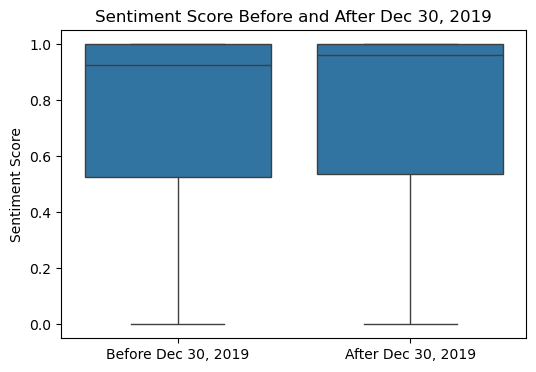

Standard Deviation Before Dec 30, 2019: 0.3177
Standard Deviation After Dec 30, 2019: 0.3314


In [26]:
# =========================== Statistical Test: Verifying Sentiment Changes ===========================
# We apply two statistical methods to test whether there is a significant change in sentiment scores 
# before and after December 30, 2019:
# 
# 1. **T-test (t-Test)**: Assumes normal distribution. Compares the means of two datasets.
# 2. **Mann-Whitney U Test (Non-parametric test)**: Used when the data does not meet normality assumptions.
# 
# Interpretation:
# - **p < 0.05** → Significant difference, supporting the hypothesis (Sentiment changed after Dec 30, 2019).
# - **p >= 0.05** → No significant difference, rejecting the hypothesis (No sentiment change occurred).

# Step 1: Import necessary libraries
import pandas as pd # For handling data
import numpy as np # For numerical computations
import seaborn as sns # For visualization
import matplotlib.pyplot as plt # For plotting
from scipy.stats import ttest_ind, mannwhitneyu # For statistical tests

# Step 2: Load cleaned dataset containing sentiment scores
file_path = r"C:\\Users\\wusiq\\Desktop\\cleaned_sentiment_data.csv" # File path
df = pd.read_csv(file_path) # Load dataset

# Step 3: Convert Timestamp column to datetime format for correct time-based analysis
df["Timestamp"] = pd.to_datetime(df["Timestamp"], errors="coerce")

# Step 4: Ensure Sentiment Score is numeric to avoid errors in calculations
df["Sentiment Score"] = pd.to_numeric(df["Sentiment Score"], errors="coerce")

# Step 5: Define the cutoff date for pre-pandemic and post-pandemic comparison
cutoff_date = pd.Timestamp("2019-12-30")

# Step 6: Split data into two groups based on the cutoff date
before = df[df["Timestamp"] < cutoff_date]["Sentiment Score"].dropna()
after = df[df["Timestamp"] >= cutoff_date]["Sentiment Score"].dropna()

# Step 7: Debugging: Check the number of data points in each group
print(f"Data points before {cutoff_date}: {len(before)}")
print(f"Data points after {cutoff_date}: {len(after)}")

# =========================== Apply Statistical Tests ===========================

# Step 8: Perform T-test (Assuming normal distribution)
t_stat, p_value = ttest_ind(before, after, equal_var=False)
print(f"T-Test Result: t = {t_stat:.3f}, p = {p_value:.5f}")

# Step 9: Perform Mann-Whitney U Test (Non-parametric test)
u_stat, p_mw = mannwhitneyu(before, after, alternative="two-sided")
print(f"Mann-Whitney U Test Result: U = {u_stat:.3f}, p = {p_mw:.5f}")

# =========================== Data Visualization ===========================

# Step 10: Boxplot visualization to compare sentiment distributions
plt.figure(figsize=(6, 4))
sns.boxplot(x=["Before Dec 30, 2019"] * len(before) + ["After Dec 30, 2019"] * len(after),
            y=pd.concat([before, after]))

plt.title("Sentiment Score Before and After Dec 30, 2019")
plt.ylabel("Sentiment Score")
plt.show()
# =========================== Additional Analysis: Checking Sentiment Variance ===========================

# Step 11: Compute standard deviation to analyze sentiment variance
std_before = np.std(before) # Standard deviation before the cutoff
std_after = np.std(after) # Standard deviation after the cutoff

# Step 12: Debugging: Print standard deviation values
print(f"Standard Deviation Before Dec 30, 2019: {std_before:.4f}")
print(f"Standard Deviation After Dec 30, 2019: {std_after:.4f}")

# =========================== Interpretation of Results ===========================

# If **p < 0.05** in either test:
# There is a significant difference in sentiment scores before and after the pandemic.
# Otherwise, there is **no statistically significant change** in sentiment scores.
